In [1]:
#Análisis de la señal Davs

#'aplanar' la señal

# setear el cero como el valor lejos del espectro

#calcular los ceros


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
from scipy.signal import savgol_filter

def cargar_datos(n, i, ruta):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Extraer variables

    globals()['tiempos1'] = data_tiempos_Ch1[col_name].values
    globals()['voltajes1'] = data_señales_Ch1[col_name].values

    globals()['tiempos2'] = data_tiempos_Ch2[col_name].values
    globals()['voltajes2'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()['error_Ch1'] = escala_Ch1 * 10 / 256
    globals()['error_Ch2'] = escala_Ch2 * 10 / 256


def lineal(x, m, b):
  y =  m * x + b
  return y


def cargar_datos_2(n, i, ruta, a):
    
    #n número de datos tomados +1
    # i número de medición -1 (empezando a contar desde 1)
    # sufijo para cada medición distinta

    columnas = [f'{j}' for j in range(1, n)]

    # Rutas a archivos
    señales_Ch1 = os.path.join(ruta, 'Mediciones_CH1.csv')
    señales_Ch2 = os.path.join(ruta, 'Mediciones_CH2.csv')
    tiempos_Ch1 = os.path.join(ruta, 'Tiempos_CH1.csv')
    tiempos_Ch2 = os.path.join(ruta, 'Tiempos_CH2.csv')
    unidades_escalas = os.path.join(ruta, 'Unidades y escala.csv')

    # Lectura de archivos
    data_señales_Ch1 = pd.read_csv(señales_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_señales_Ch2 = pd.read_csv(señales_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch1 = pd.read_csv(tiempos_Ch1, skiprows=3, delimiter=',', header=None, names=columnas)
    data_tiempos_Ch2 = pd.read_csv(tiempos_Ch2, skiprows=3, delimiter=',', header=None, names=columnas)
    data_unidades_escalas = pd.read_csv(unidades_escalas, delimiter=',', header=None, names=columnas)

    # Selección de columna
    col_name = str(i + 1)

    # Variables con sufijo personalizado
    globals()[f'tiempos1_{a}'] = data_tiempos_Ch1[col_name].values
    globals()[f'voltajes1_{a}'] = data_señales_Ch1[col_name].values

    globals()[f'tiempos2_{a}'] = data_tiempos_Ch2[col_name].values
    globals()[f'voltajes2_{a}'] = data_señales_Ch2[col_name].values

    escala_Ch1 = float(data_unidades_escalas[col_name].iloc[4])
    escala_Ch2 = float(data_unidades_escalas[col_name].iloc[8])

    globals()[f'error_Ch1_{a}'] = escala_Ch1 * 10 / 256
    globals()[f'error_Ch2_{a}'] = escala_Ch2 * 10 / 256


def graficar_4_subplots(x1, y1, x2, y2, x3, y3, x4, y4):
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))

    # Gráfico 1
    axs[0, 0].plot(x1, y1, '.', color = 'darkcyan', label= 'Canal 1')
    axs[0, 0].set_title("señal osciloscopio")
    axs[0, 0].set_xlabel("tiempo [s]")
    axs[0, 0].set_ylabel("v")

    # Gráfico 2
    axs[0, 1].plot(x2, y2, ".", color = 'darkslategray')
    axs[0, 1].set_title("recorte lineal")
    axs[0, 1].set_xlabel("tiempo [s]")
    axs[0, 1].set_ylabel("v")

    # Gráfico 3
    axs[1, 0].plot(x3, y3, ".", markersize=2, color = 'darkslategray')
    axs[1, 0].set_title("aplanado")
    axs[1, 0].set_xlabel("tiempo [s]")
    axs[1, 0].set_ylabel("Absorción [a.u.]")

    # Gráfico 4
    axs[1, 1].plot(x4, y4, ".", markersize=2, color = 'darkslategray')
    axs[1, 1].set_title("normalizado e invertido")
    axs[1, 1].set_xlabel("tiempo [s]")
    axs[1, 1].set_ylabel("Absorción [a.u.]")

    plt.tight_layout()
    plt.show()


# primer análisis

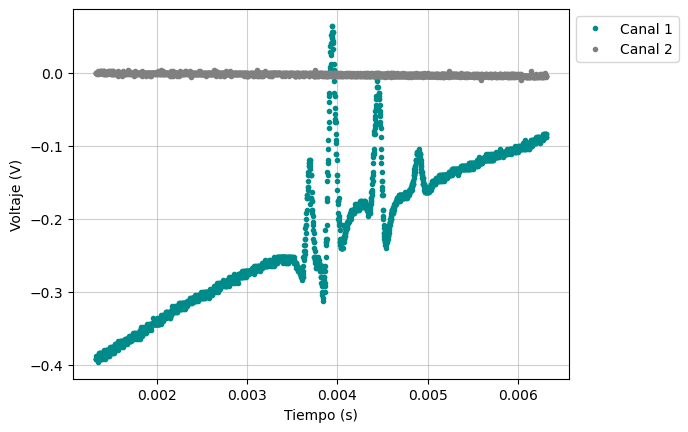

In [4]:
cargar_datos(n=5, i=0, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs')


plt.plot(tiempos1, voltajes1,'.', color = 'darkcyan', label= 'Canal 1')
plt.plot(tiempos2, voltajes2, '.', color ='gray', label= 'Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()

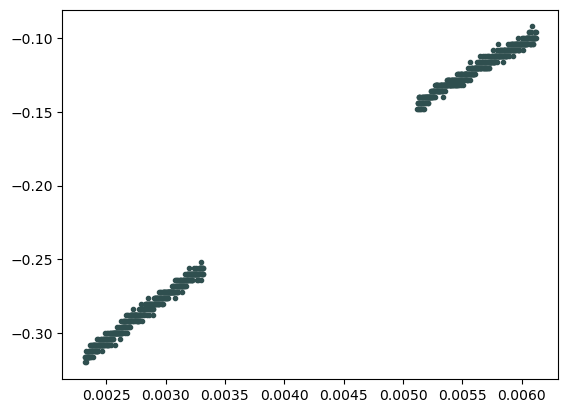

   Los parametros óptimos son  Los errores de los parámetros son
0                   58.546418                           0.086415
1                   -0.449955                           0.000385


In [71]:
#uso los dos extremos de la parte lineal para ajustar

A = 500
B = 1000

C = 1900
D = 2400

plt.plot(tiempos2[A:B], voltajes1[A:B], ".", color = 'darkslategray')
plt.plot(tiempos2[C:D], voltajes1[C:D], ".", color = 'darkslategray')

plt.show()

#para que esté bien plana la señal, uso un intervalo antes del espectro, y después del espectro,
#y realizo el ajuste lineal con estos dos intervalos
voltajes_intervalos = np.concatenate([voltajes1[A:B], voltajes1[C:D]])
tiempos_intervalos = np.concatenate([tiempos2[A:B], tiempos2[C:D]])

#Cuando se vea la recta, hago el ajuste:

param_iniciales = [0.01, 0]
popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos,voltajes_intervalos, p0=param_iniciales, sigma = error_Ch1, absolute_sigma=True)
incertidumbre_0 = np.sqrt(np.diag(pcov_0))

tabla = pd.DataFrame({
        'Los parametros óptimos son': popt_0,
        'Los errores de los parámetros son': incertidumbre_0,
        })

print(tabla)


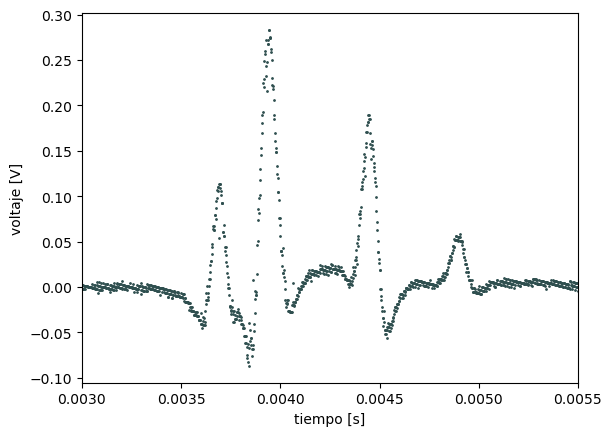

In [21]:
#Grafico el espectro sin la componente que hace crecer la intensidad del láser por
#el solo hecho de que tiene más corriente

x_fit_n =  np.linspace(np.min(tiempos2), np.max(tiempos2), len(tiempos2), endpoint = True)

plt.plot(tiempos2, voltajes1 - lineal(x_fit_n, *popt_0), ".", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('voltaje [V]')

plt.xlim(0.003, 0.0055)
plt.show()


espectro = voltajes1 - lineal(x_fit_n, *popt_0)

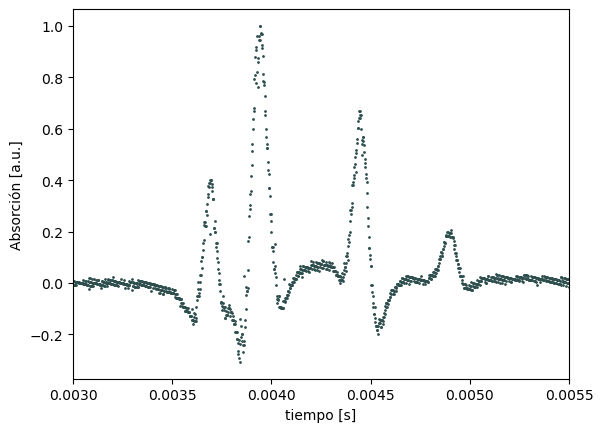

In [29]:
#inertimos, para graficar la absorción en función del tiempo
#Y normalizamos para que el pico de mayor amplitud valga 1

#espectro_inv = espectro * (-1) # acá no hace falta invertirlo
espectro_norm = espectro / np.max(espectro)


plt.plot(tiempos2, espectro_norm, ".", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

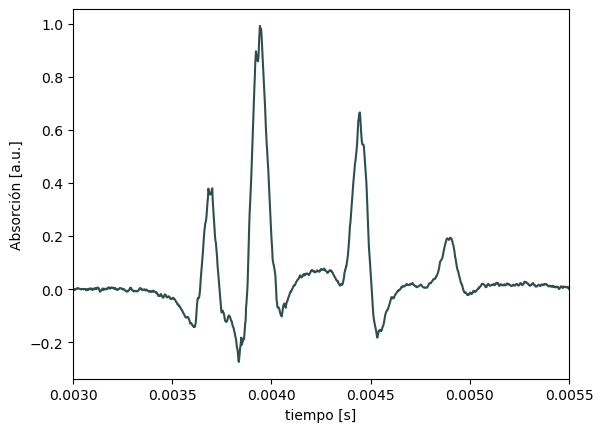

In [36]:
#pruebo de interpolar para suavizar la señal:

#(filtro 'Savitzky-Golay')
from scipy.signal import savgol_filter
señal_suavizada = savgol_filter(espectro_norm, window_length=11, polyorder=2)

plt.plot(tiempos2, señal_suavizada, "-", markersize=2, color = 'darkslategray')

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

# compacto esto para que sea más rápido

replace _a para poder ir guardando varias mediciones distintas

   Los parametros óptimos son  Los errores de los parámetros son
0                   58.546418                           0.086415
1                   -0.449955                           0.000385


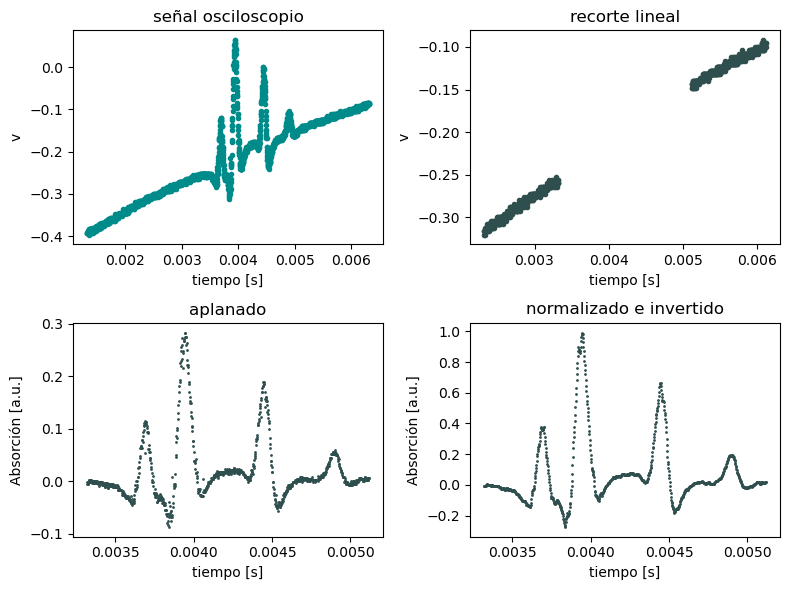

In [2]:
cargar_datos_2(n = 5, i = 0, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_davs', a = 'a')

#uso los dos extremos de la parte lineal para ajustar
A = 500
B = 1000

C = 1900
D = 2400

voltajes_intervalos_a = np.concatenate([voltajes1_a[A:B], voltajes1_a[C:D]])
tiempos_intervalos_a = np.concatenate([tiempos1_a[A:B], tiempos1_a[C:D]])

#Cuando se vea la recta, hago el ajuste:

x_fit_a =  np.linspace(np.min(tiempos2_a), np.max(tiempos2_a), len(tiempos2_a), endpoint = True)

param_iniciales = [0.01, 0]
popt_0, pcov_0 = curve_fit(lineal, tiempos_intervalos_a,voltajes_intervalos_a, p0=param_iniciales, sigma = error_Ch1_a, absolute_sigma=True)
incertidumbre_0 = np.sqrt(np.diag(pcov_0))

tabla = pd.DataFrame({
        'Los parametros óptimos son': popt_0,
        'Los errores de los parámetros son': incertidumbre_0,
        })
print(tabla)


t_espectro_a = tiempos1_a[B:C] #así ya está recortado
espectro_a = (voltajes1_a - lineal(x_fit_a, *popt_0))[B:C] 

#inertimos, para graficar la absorción en función del tiempo
#Y normalizamos para que el pico de mayor amplitud valga 1
espectro_a_inv = espectro_a * (-1)
espectro_a_norm = espectro_a / np.max(espectro_a)


#filtrado
señal_suavizada_a = savgol_filter(espectro_a_norm, window_length=11, polyorder=2)


graficar_4_subplots(tiempos1_a, voltajes1_a, tiempos_intervalos_a, voltajes_intervalos_a, t_espectro_a, espectro_a, t_espectro_a, señal_suavizada_a)


# Buscar los ceros

In [51]:
# definimos esta función, que al detectar un cruce por el eje x, hace una lineal entre esos dos puntos

def detectar_cruces_cero(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 * y2 < 0:  # hay cruce por cero
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)


def detectar_cruces_cero_negativos(tiempos, señal):
    cruces = []

    for i in range(len(señal) - 1):
        y1, y2 = señal[i], señal[i + 1]
        if y1 > 0 and y2 < 0:  # Cruce por cero con pendiente negativa
            t1, t2 = tiempos[i], tiempos[i + 1]
            # Interpolación lineal para encontrar el tiempo exacto del cruce
            t_cruce = t1 - y1 * (t2 - t1) / (y2 - y1)
            cruces.append(t_cruce)

    return np.array(cruces)

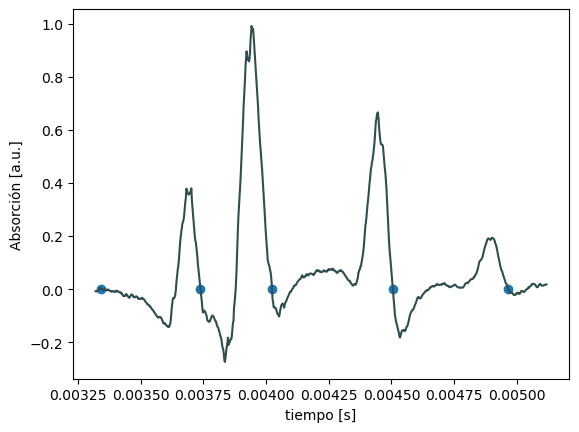

In [53]:
from scipy.signal import savgol_filter
señal_suavizada = savgol_filter(espectro_norm, window_length=11, polyorder=2)

a = 1000
b = 1900

plt.plot(tiempos2[a:b], señal_suavizada[a:b], "-", markersize=2, color = 'darkslategray')
#plt.scatter(np.array(cruces_por_cero), np.zeros(len(cruces_por_cero)))
plt.scatter(np.array(cruces_negativos), np.zeros(len(cruces_negativos)))

plt.xlabel('tiempo [s]')
plt.ylabel('Absorción [a.u.]')

#plt.xlim(0.003, 0.0055)
#plt.ylim(0)
plt.show()

In [52]:
cruces_por_cero = detectar_cruces_cero(tiempos2[a:b], señal_suavizada[a:b])

print("Cruces por cero en segundos:")
print(cruces_por_cero)

cruces_negativos = detectar_cruces_cero_negativos(tiempos2[a:b], señal_suavizada[a:b])

print("Cruces por cero (pendiente negativa):")
print(cruces_negativos)

Cruces por cero en segundos:
[0.00333338 0.00334338 0.00364035 0.00373798 0.00387855 0.00402355
 0.0041043  0.00450539 0.00464993 0.00496625 0.00503949]
Cruces por cero (pendiente negativa):
[0.00334338 0.00373798 0.00402355 0.00450539 0.00496625]



# Graficamos ambos canales.



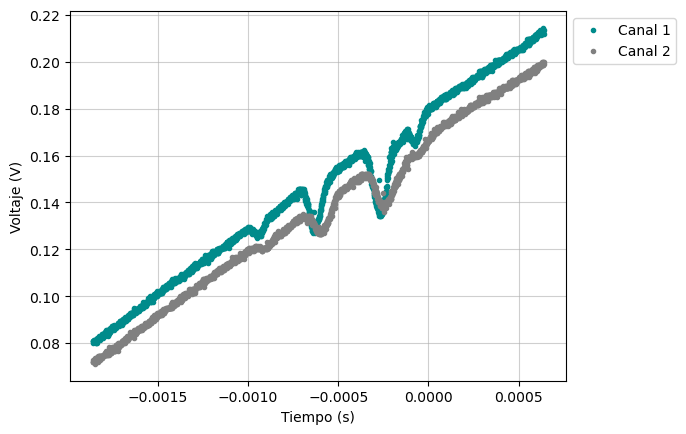

In [85]:
cargar_datos_1(n=4, i=2, ruta='/Users/Mauri/Desktop/Labo 5/Espectroscopía láser/Med_comparación')


plt.plot(tiempos1_1, voltajes1_1,'.', color = 'darkcyan', label= 'Canal 1')
plt.plot(tiempos2_1, voltajes2_1, '.', color ='gray', label= 'Canal 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(-0.0015,-00.0016)
plt.grid(alpha = 0.6)
plt.show()


# Comparación entre davs y cada canal